In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import os



from scipy import stats
from scipy.spatial.distance import jensenshannon


In [2]:
def constructGraph_EM(mod_num):
    
    nodes = pd.read_csv("./EM_communities/averageSubComm%d_drosophilia.csv"%mod_num).Node.to_list()
    
    # EM network for Module 
    
    df = pd.read_csv("traced-total-connections.csv")
    nodeA_list = df.bodyId_pre.tolist()
    nodeB_list = df.bodyId_post.tolist()
    weight_list = df.weight.tolist()
    
    # creating an edge list from adjacency matrix
    edge_list=[]
    for l,m,w in zip(nodeA_list, nodeB_list, weight_list):
        if (l in nodes) and (m in nodes):
            edge_list.append( (l,m,{"weight":w}))
    
    G_EM = nx.DiGraph()
    
    # Add all the nodes to the graph
    G_EM.add_nodes_from(nodes)
    # Add all the edges to the graph
    G_EM.add_edges_from(edge_list)
    return G_EM
    

In [3]:
def constructGraph_model(mod_num, pr, graph_path):

    
    #path = "./janelia_Comm%d/"%mod_num
    nodes = pd.read_csv("./EM_communities/averageSubComm%d_drosophilia.csv"%mod_num).Node.to_list()
    
    df_network = pd.read_csv(graph_path+"network_%.1fum.txt"%pr, sep="\t", header=None)
    df_network = df_network.rename(columns={0: "bodyId_pre", 1: "bodyId_post", 2:"weight"})
    
    nodeA_list = df_network.bodyId_pre.tolist()
    nodeB_list = df_network.bodyId_post.tolist()
    weight_list = df_network.weight.tolist()
    
    # creating an edge list from adjacency matrix
    edge_list=[]
    for l,m,w in zip(nodeA_list, nodeB_list, weight_list):
        if (l in nodes) and (m in nodes):
            edge_list.append( (l,m,{"weight":w}))
        
    G_strah = nx.DiGraph()
    
    # Add all the nodes to the graph
    G_strah.add_nodes_from(nodes)
    # Add all the edges to the graph
    G_strah.add_edges_from(edge_list)
    return G_strah

In [4]:
def plot_constbin(degree):
    degree = np.array(degree) # if list convert to np array
    deg = degree[degree>0] # don't consider values=0
    #binsize=75
    #nbins = int((max(deg)-min(deg))/binsize)
    edges= np.histogram_bin_edges(deg,bins='auto')#=nbins)# bins="auto"
    pk = np.array(plt.hist(deg,bins=edges,density=True)[0])

    plt.close()

    edges2 = list(edges[1:])+[0]

    mid_point = (np.array([a+b for a,b in zip(edges,edges2)])/2)[:-1]
    return mid_point, pk
    

In [5]:
def compare_indegree(mod_num, pr, graph_path, save_path):
    G_EM = constructGraph_EM(mod_num)
    G_strah = constructGraph_model(mod_num, pr, graph_path)

    EM_in_deg = list(dict(G_EM.in_degree(weight='weight')).values())
    #EM_out_deg = list(dict(G_EM.out_degree(weight='weight')).values())
    
    strah_in_deg = list(dict(G_strah.in_degree(weight='weight')).values())
    #strah_in_deg = list(dict(G_strah.out_degree(weight='weight')).values())

    
    mid_point1, pk1 = plot_constbin(EM_in_deg)

    mid_point2, pk2 = plot_constbin(strah_in_deg)
    
    
    plt.loglog(mid_point1, pk1,'o', alpha=0.7, color='#d62728', label='EM In-degree')
    
    plt.loglog(mid_point2, pk2,'o', alpha=0.7,color='#9467bd', label='Model In-degree')
    #plt.axvline(3000,ls="--", linewidth=2.5,color="k" )
    
    plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    plt.grid(linestyle='--',alpha=0.5,which='both')
    plt.xlabel("In-degree",size=15)
    plt.ylabel("Degree distribution",size=15)
    plt.title(r"Module %d, PR %.1f$\mu$m"%(mod_num+1, pr))
    
    plt.legend(loc='best')#, prop={'size':15})
    
    plt.rcParams['font.size']=15
    
    plt.savefig(save_path+"mod%d_pr%.1f.pdf"%((mod_num+1), pr),
                facecolor="white", bbox_inches="tight", dpi=600)

In [6]:
def compare_outdegree(mod_num, pr, graph_path, save_path):
    G_EM = constructGraph_EM(mod_num)
    G_strah = constructGraph_model(mod_num, pr, graph_path)

    EM_out_deg = list(dict(G_EM.out_degree(weight='weight')).values())
    
    strah_out_deg = list(dict(G_strah.out_degree(weight='weight')).values())
    
    mid_point1, pk1 = plot_constbin(EM_out_deg)

    mid_point2, pk2 = plot_constbin(strah_out_deg)
    
    plt.loglog(mid_point1, pk1,'o', alpha=0.7, color='#d62728', label='EM Out-degree')
    
    plt.loglog(mid_point2, pk2,'o', alpha=0.7,color='#9467bd', label='Model Out-degree')
    #plt.axvline(3000,ls="--", linewidth=2.5,color="k" )
    
    plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    plt.grid(linestyle='--',alpha=0.5,which='both')
    plt.xlabel("Out-degree",size=15)
    plt.ylabel("Degree distribution",size=15)
    plt.title(r"Module %d, PR %.1f$\mu$m"%(mod_num+1, pr))
    
    plt.legend(loc='best')#, prop={'size':15})
    
    plt.rcParams['font.size']=15
    
    plt.savefig(save_path+"mod%d_pr%.1f.pdf"%((mod_num+1), pr),
                facecolor="white", bbox_inches="tight", dpi=600)

In [7]:
image_path = "./comm_degDistr_images/"
if not os.path.isdir(image_path):
    os.mkdir(image_path)

image_path = "./comm_degDistr_images/indegree/"
if not os.path.isdir(image_path):
    os.mkdir(image_path)

image_path = "./comm_degDistr_images/outdegree/"
if not os.path.isdir(image_path):
    os.mkdir(image_path)

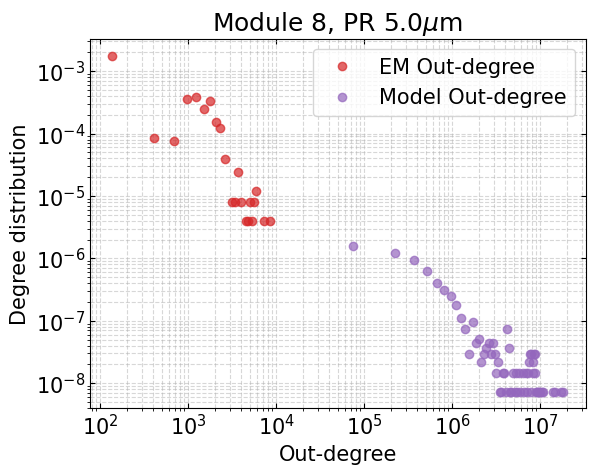

In [9]:
for mod_num in range(8):
    graph_path = "./janelia_Comm%d/"%mod_num
    
    image_path = "./comm_degDistr_images/indegree/"
    compare_indegree(mod_num, 1.0, graph_path, image_path)
    compare_indegree(mod_num, 5.0, graph_path, image_path)

    image_path = "./comm_degDistr_images/outdegree/"
    compare_outdegree(mod_num, 1.0, graph_path, image_path)
    compare_outdegree(mod_num, 5.0, graph_path, image_path)
    

# Module 8, different PR degree distribution analysis

In [10]:
image_path = "./module_8/indegree/"
if not os.path.isdir(image_path):
    os.mkdir(image_path)
    
image_path = "./module_8/outdegree/"
if not os.path.isdir(image_path):
    os.mkdir(image_path)


CPU times: user 3min 55s, sys: 1.35 s, total: 3min 56s
Wall time: 3min 46s


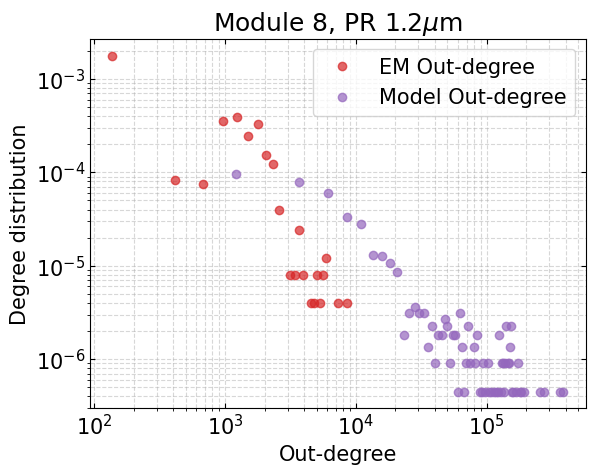

In [12]:
%%time
mod_num = 7 # In python it is 0-7 instead of counting from 1 to 8
graph_path = "./module_8/"
    
for pr in [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]:
    
    image_path = "./module_8/indegree/"
    compare_indegree(mod_num, pr, graph_path, image_path)

    image_path = "./module_8/outdegree/"
    compare_outdegree(mod_num, pr, graph_path, image_path)
    

### Module 8: Comparison between EM degree distribution and Model reconstructed degree distribution

In [27]:
%%time
indeg_ks = []
outdeg_ks = []
indeg_pval = []
outdeg_pval = []

mod_num=7
G_EM = constructGraph_EM(mod_num)
EM_in_deg = list(dict(G_EM.in_degree(weight='weight')).values())
EM_out_deg = list(dict(G_EM.out_degree(weight='weight')).values())

for pr in [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]:

    graph_path="./module_8/"
    G_strah = constructGraph_model(mod_num, pr, graph_path)
    
    strah_in_deg = list(dict(G_strah.in_degree(weight='weight')).values())
    strah_out_deg = list(dict(G_strah.out_degree(weight='weight')).values())
        
    # KS test compares the empirical CDFs
    ks_stat, p_value = stats.ks_2samp(EM_in_deg, strah_in_deg)
    indeg_ks.append(ks_stat)
    indeg_pval.append(p_value)
    
    ks_stat, p_value = stats.ks_2samp(EM_out_deg, strah_out_deg)
    outdeg_ks.append(ks_stat)
    outdeg_pval.append(p_value)


CPU times: user 18.9 s, sys: 124 ms, total: 19 s
Wall time: 19 s


In [28]:
df_kstest = pd.DataFrame({"pr":[0.2, 0.4, 0.6, 0.8, 1.0, 1.2],
                         "indeg_ks":indeg_ks, "indeg_pval":indeg_pval,
                         "outdeg_ks":outdeg_ks, "outdeg_pval":outdeg_pval})
df_kstest.to_csv("./module_8/kstest_results.csv",index=False)

In [29]:
df_kstest

,pr,indeg_ks,indeg_pval,outdeg_ks,outdeg_pval
0,0.2,0.912052,0.000000e+00,0.554832,9.893434e-131
1,0.4,0.865364,0.000000e+00,0.269273,9.001311e-30
2,0.6,0.829533,1.393265e-321,0.297503,2.385988e-36
3,0.8,0.811075,1.665061e-304,0.376764,1.348529e-58
4,1.0,0.799131,6.981942e-294,0.584148,6.855820e-146
5,1.2,0.792617,3.193113e-288,0.724213,7.083447e-234


### jensen shannon distribution comparison

In [22]:

def compute_jsd_empirical(degrees1, degrees2, bins='auto'):
    """
    Compute JSD between two degree distributions using empirical histograms.
    
    Args:
        degrees1 (array-like): Degree sequence of graph 1.
        degrees2 (array-like): Degree sequence of graph 2.
        bins (int or str): Number of bins for histogram (passed to np.histogram).
    
    Returns:
        jsd (float): Jensen-Shannon Divergence (in bits, range [0, 1]).
    """
    # Combine degrees to determine shared bin edges
    all_degrees = np.concatenate([degrees1, degrees2])
    bin_edges = np.histogram_bin_edges(all_degrees, bins=bins)
    
    # Compute normalized histograms (empirical PMFs)
    hist1, _ = np.histogram(degrees1, bins=bin_edges, density=True)
    hist2, _ = np.histogram(degrees2, bins=bin_edges, density=True)
    
    # Avoid zero probabilities for JSD calculation
    hist1 = np.clip(hist1, 1e-10, None)
    hist2 = np.clip(hist2, 1e-10, None)
    
    # Normalize again after clipping
    hist1 = hist1 / hist1.sum()
    hist2 = hist2 / hist2.sum()
    
    # Compute JSD (base 2 for bits)
    jsd = jensenshannon(hist1, hist2, base=2)
    return jsd



In [23]:
%%time
indeg_jsd = []
outdeg_jsd = []

mod_num=7
G_EM = constructGraph_EM(mod_num)
EM_in_deg = list(dict(G_EM.in_degree(weight='weight')).values())
EM_out_deg = list(dict(G_EM.out_degree(weight='weight')).values())

for pr in [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]:

    graph_path="./module_8/"
    G_strah = constructGraph_model(mod_num, pr, graph_path)
    
    strah_in_deg = list(dict(G_strah.in_degree(weight='weight')).values())
    strah_out_deg = list(dict(G_strah.out_degree(weight='weight')).values())


    jsd = compute_jsd_empirical(EM_in_deg, strah_in_deg, bins='auto')
    indeg_jsd.append(jsd)
    
    jsd = compute_jsd_empirical(EM_out_deg, strah_out_deg, bins='auto')
    outdeg_jsd.append(jsd)


CPU times: user 18.9 s, sys: 116 ms, total: 19 s
Wall time: 19 s


In [25]:
df_jsd = pd.DataFrame({"pr":[0.2, 0.4, 0.6, 0.8, 1.0, 1.2],
                         "indeg_jsd":indeg_jsd,
                         "outdeg_jsd":outdeg_jsd})
df_jsd.to_csv("./module_8/jensenShannon_results.csv",index=False)

In [26]:
df_jsd

,pr,indeg_jsd,outdeg_jsd
0,0.2,0.543812,0.493367
1,0.4,0.590427,0.457997
2,0.6,0.609274,0.444830
3,0.8,0.605737,0.517854
4,1.0,0.579822,0.602778
5,1.2,0.553957,0.693437


### Plotting the comparison results

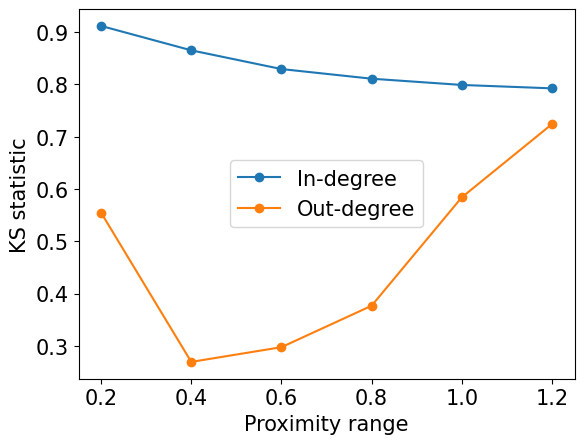

In [35]:
pr_list = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]

plt.plot(pr_list, df_kstest.indeg_ks.tolist(), "o-", label="In-degree")
plt.plot(pr_list, df_kstest.outdeg_ks.tolist(), "o-", label="Out-degree")
plt.xlabel("Proximity range")
plt.ylabel("KS statistic")

plt.legend(loc="best")

plt.rcParams['font.size']=15
    
plt.savefig("./module_8/kstest.pdf",
            facecolor="white", bbox_inches="tight", dpi=600)

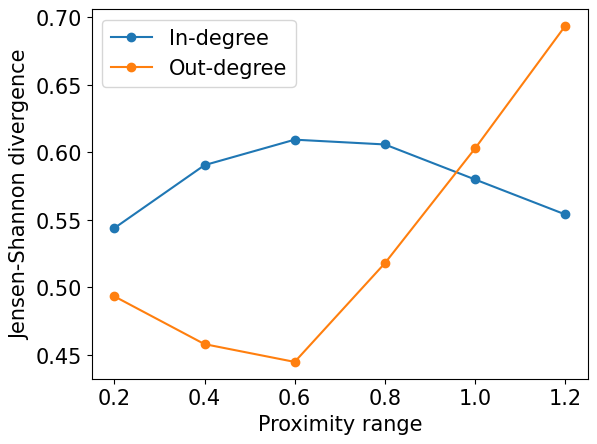

In [36]:
pr_list = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]

plt.plot(pr_list, df_jsd.indeg_jsd.tolist(), "o-", label="In-degree")
plt.plot(pr_list, df_jsd.outdeg_jsd.tolist(), "o-", label="Out-degree")
plt.xlabel("Proximity range")
plt.ylabel("Jensen-Shannon divergence")

plt.legend(loc="best")

plt.rcParams['font.size']=15
    
plt.savefig("./module_8/jsd.pdf",
            facecolor="white", bbox_inches="tight", dpi=600)

In [37]:
G_EM.number_of_nodes()

921

In [38]:
G_strah.number_of_nodes()

921